# Explore here

In [17]:

# from keras.preprocessing.image import load_img
import keras.preprocessing.image as image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



import warnings

In [6]:
img = load_img('../data/processed/train/cat.0.jpg')
print(img.size)
img.show()

(500, 374)


In [7]:
img = img.resize([200, 200])

print(img.size)
img.show()

(200, 200)


In [10]:
import os

data_dir = r'C:\Users\34616\Documents\4GEEKS\clases\clase27_DeepLearning\deep-learning-project\data\processed\train'
dog_images = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.startswith('dog')]
cat_images = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.startswith('cat')]

img = image.load_img(cat_images[0])
img.show()



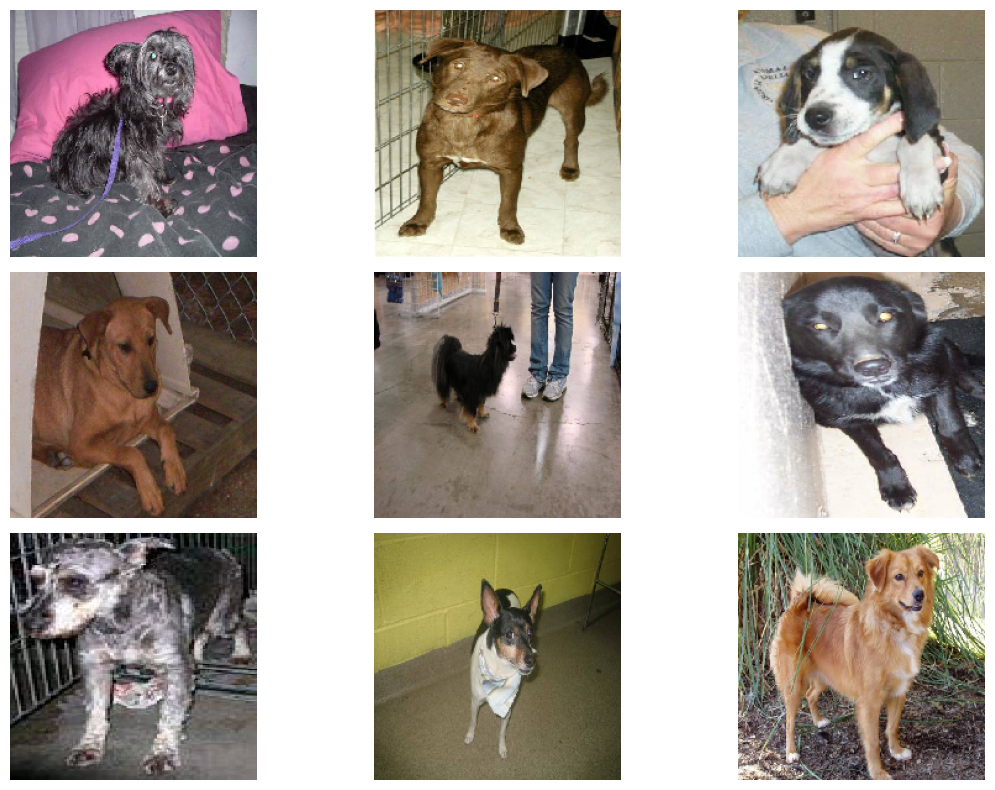

array([[[0.4627451 , 0.45490196, 0.49803922],
        [0.4509804 , 0.44313726, 0.49411765],
        [0.41568628, 0.40392157, 0.47058824],
        ...,
        [0.52156866, 0.5294118 , 0.5764706 ],
        [0.52156866, 0.53333336, 0.5686275 ],
        [0.5137255 , 0.5137255 , 0.54509807]],

       [[0.46666667, 0.45882353, 0.5019608 ],
        [0.45882353, 0.4509804 , 0.5019608 ],
        [0.42352942, 0.4117647 , 0.47843137],
        ...,
        [0.5254902 , 0.53333336, 0.5803922 ],
        [0.5254902 , 0.5372549 , 0.57254905],
        [0.5294118 , 0.5294118 , 0.56078434]],

       [[0.47843137, 0.47058824, 0.5137255 ],
        [0.46666667, 0.45882353, 0.50980395],
        [0.43137255, 0.41960785, 0.4862745 ],
        ...,
        [0.5411765 , 0.54901963, 0.59607846],
        [0.5254902 , 0.5372549 , 0.57254905],
        [0.53333336, 0.53333336, 0.5647059 ]],

       ...,

       [[0.2784314 , 0.29803923, 0.3137255 ],
        [0.28235295, 0.3019608 , 0.31764707],
        [0.2627451 , 0

In [26]:
 # Cargar y procesar las imágenes
def image_processing(archivo):
    num_images_to_load = min(9, len(archivo))
    images = []
    for i in range(num_images_to_load):
        img_path = os.path.join(data_dir, archivo[i])
        img = image.load_img(img_path, target_size=(200, 200))  # Ajusta el tamaño según sea necesario
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalizar los valores de los píxeles a [0, 1]
        images.append(img_array)
    # Crear una única figura para mostrar las nueve imágenes
    plt.figure(figsize=(12, 8))
    for i in range(num_images_to_load):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    # Ajustar el diseño
    plt.tight_layout()
    # Mostrar las imágenes
    plt.show()
    return images[0]

image_processing(dog_images)

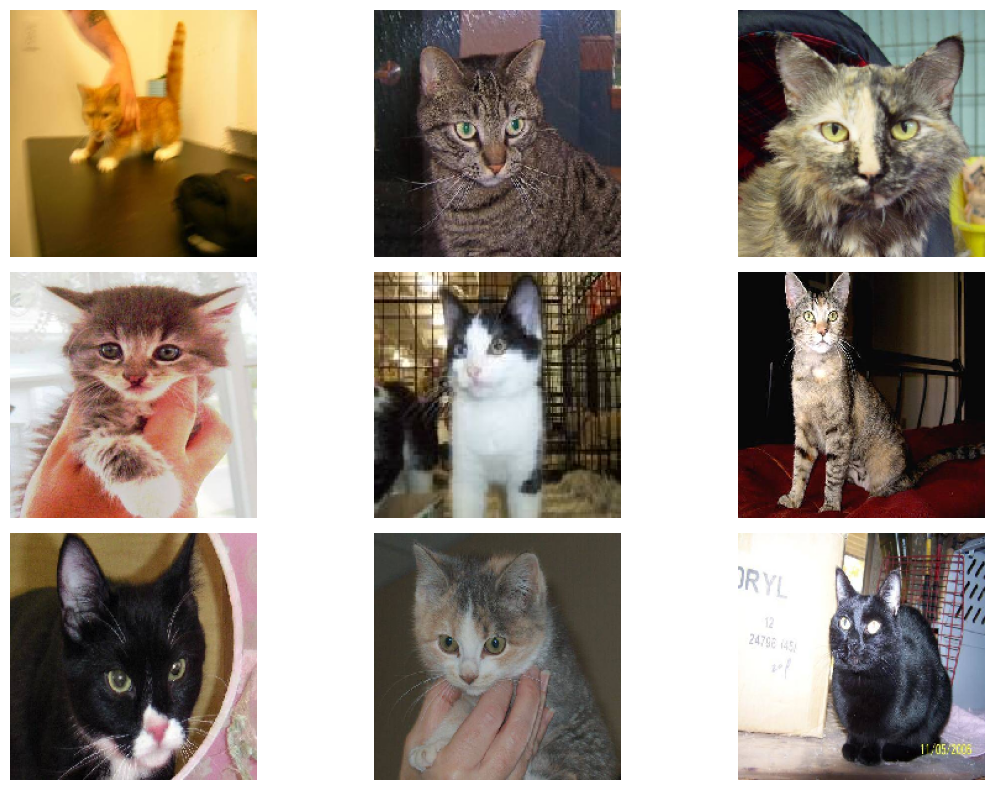

In [28]:
decision = str(input("do you like cats or dogs more? "))
if decision.lower() == "cats":
    image_processing(cat_images)

elif decision.lower() == "dogs":
    image_processing(dog_images)

else:
    print("Oops, invalid animal. ")
    decision = str(input("Enter 'cats' or 'dogs':"))



In [ ]:
# Ruta de la carpeta que contiene las imágenes
data_dir = r"C:\Users\34616\Documents\4GEEKS\clases\clase27_DeepLearning\deep-learning-project\data\processed\train"
# Verificar la existencia de la ruta base
print(f"Verificando ruta: {data_dir}")
if not os.path.exists(data_dir):
    print(f"La ruta base no existe: {data_dir}")
else:
    print(f"La ruta base existe: {data_dir}")
    try:
        # Obtener una lista de todos los nombres de archivos de imágenes que contienen "dog" en su nombre
        dog_image_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f)) and 'dog' in f.lower() and f.endswith(('.png', '.jpg', '.jpeg'))]
        # Imprimir la lista de archivos de imágenes de perros
        print(f"Archivos de imágenes de perros en {data_dir}: {dog_image_files}")
        # Limitar a las primeras 9 imágenes si hay más
        num_images_to_load = min(9, len(dog_image_files))
        images = []
        # Cargar y procesar las imágenes
        for i in range(num_images_to_load):
            img_path = os.path.join(data_dir, dog_image_files[i])
            img = image.load_img(img_path, target_size=(224, 224))  # Ajusta el tamaño según sea necesario
            img_array = image.img_to_array(img)
            img_array /= 255.0  # Normalizar los valores de los píxeles a [0, 1]
            images.append(img_array)
        # Crear una única figura para mostrar las nueve imágenes
        plt.figure(figsize=(12, 8))
        for i in range(num_images_to_load):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i])
            plt.title('Dog Image')
            plt.axis('off')
        # Ajustar el diseño
        plt.tight_layout()
        # Mostrar las imágenes
        plt.show()
    except Exception as e:
        print(f"Ocurrió un error al listar los archivos o cargar las imágenes: {e}")